# Decision Tree Regression

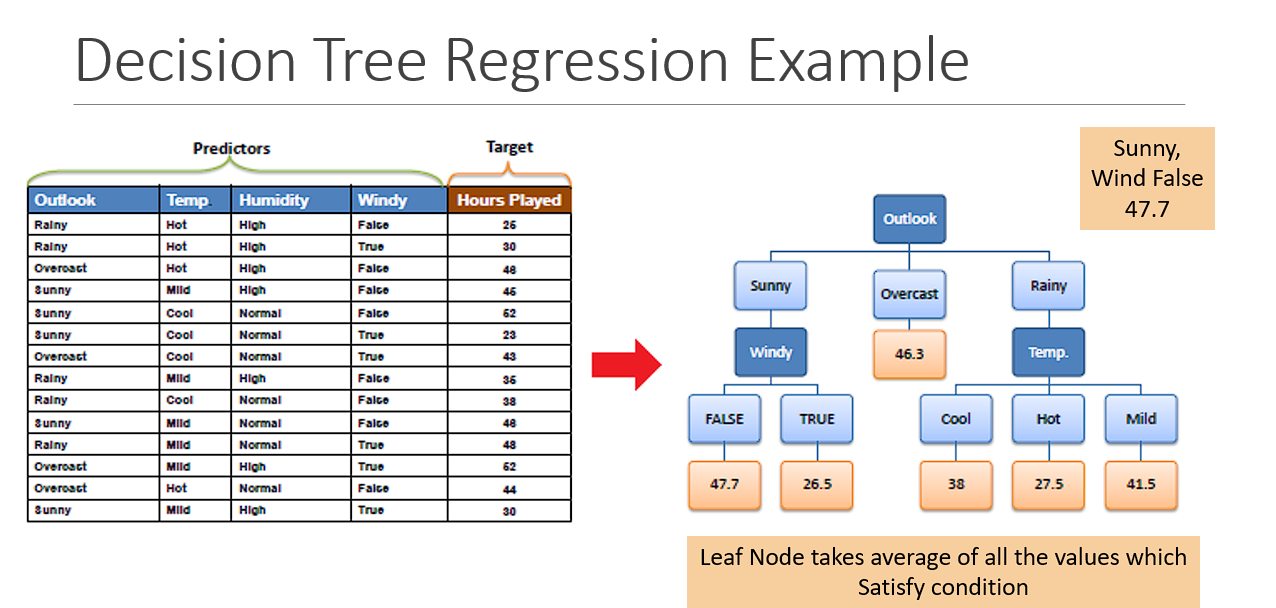

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step1: Read the dataset

In [1]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7496\2230849712.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## PROFIT is target feature
### Step 2: Perform the basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [4]:
df.duplicated().sum()

0

## Step 3: Seperate X and Y

In [5]:
X = df.drop(columns=['PROFIT'])
Y =df[['PROFIT']]

In [6]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [7]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Step 4: Create a preprocessing pipeline for X

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['STATE']

In [10]:
con

['RND', 'ADMIN', 'MKT']

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [13]:
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [14]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [15]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['RND', 'ADMIN', 'MKT']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['STATE'])])

In [16]:
Xpre = pre.fit_transform(X)
Xpre.head() 

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


## Step 5: Apply train test split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xpre,Y,train_size=0.8,test_size=0.2,random_state=21)

In [23]:
print('SHAPE')
print(f'xtrain : {xtrain.shape} , xtest : {xtest.shape} , ytrain : {ytrain.shape} , ytest : {ytest.shape}')

SHAPE
xtrain : (40, 6) , xtest : (10, 6) , ytrain : (40, 1) , ytest : (10, 1)


In [24]:
xtrain.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
30,-0.258074,-0.205629,-0.990357,0.0,1.0,0.0
21,0.102724,1.169186,0.732788,0.0,0.0,1.0
19,0.279442,1.159837,-1.743127,0.0,0.0,1.0
11,0.593085,-1.065540,0.319834,1.0,0.0,0.0
22,0.006007,0.051850,0.762376,0.0,1.0,0.0


In [25]:
xtest.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
7,1.245057,0.871980,0.932186,0.0,1.0,0.0
44,-1.134305,1.206419,-1.509074,1.0,0.0,0.0
43,-1.281134,0.217682,-1.449605,0.0,0.0,1.0
25,-0.199312,0.656489,-0.603517,1.0,0.0,0.0
14,1.017181,1.269199,0.375742,0.0,1.0,0.0


In [26]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [27]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


## Step 6: Build a decision tree regression model

In [28]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1,min_samples_split=5,min_samples_leaf=5,criterion='absolute_error')
model.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=1,
                      min_samples_leaf=5, min_samples_split=5)

In [29]:
model.score(xtrain,ytrain)

0.6019636534994364

In [30]:
model.score(xtest,ytest)

0.5746278420052591

## Step 7: Hyperparemeter tuning

In [31]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10],
          'min_samples_split':[3,4,5,6,7,8],
          'min_samples_leaf':[3,4,5,6,7,8],
          'criterion':['absolute_error','squared_error']}

In [32]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=params, cv=5,scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]},
             scoring='neg_mean_squared_error')

In [33]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [34]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=3, min_samples_split=3)

In [35]:
type(gscv.best_estimator_)

sklearn.tree._classes.DecisionTreeRegressor

In [36]:
type(gscv.best_params_)

dict

## Step 8: Evaluate tuned model

In [37]:
best_dtr.score(xtrain,ytrain)

0.964491148172637

In [38]:
best_dtr.score(xtest,ytest)

0.9397388817493316

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def evaluate_model(model,x,y):
    ypred = model.predict(x)
    mse = mean_squared_error(y,ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y,ypred)
    r2 = r2_score(y,ypred)
    print(f'Mean Squared Error : {mse}')
    print(f'Root Mean Squared Error : {rmse} ')
    print(f'Mean Absolute Error: {mae}')
    print(f'R2 score : {r2}')
    print('===============================================')



In [42]:
evaluate_model(best_dtr,xtrain,ytrain)

Mean Squared Error : 54847052.080855
Root Mean Squared Error : 7405.8795615953 
Mean Absolute Error: 4473.231
R2 score : 0.964491148172637


In [43]:
evaluate_model(best_dtr,xtest,ytest)

Mean Squared Error : 106948230.94882004
Root Mean Squared Error : 10341.577778502662 
Mean Absolute Error: 6877.472
R2 score : 0.9397388817493316


In [59]:
def evaluate_model_df(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    r2 = r2_score(y, ypred)
    dct = {'MSE':[mse],
           'RMSE':[rmse],
           'MAE':[mae],
           'r2':[r2]}
    df = pd.DataFrame(dct)
    return df

In [60]:
evaluate_model_df(best_dtr,xtrain,ytrain)

,MSE,RMSE,MAE,r2
0,5.484705e+07,7405.879562,4473.231,0.964491


In [61]:
evaluate_model_df(best_dtr,xtest,ytest)

,MSE,RMSE,MAE,r2
0,1.069482e+08,10341.577779,6877.472,0.939739


In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_dtr,xtrain,ytrain,cv=3,scoring='r2')
scores

array([0.70226187, 0.83205385, 0.8124433 ])

In [46]:
scores.mean()

0.7822530060300803

## Predict train and test results

In [47]:
ypred_train = best_dtr.predict(xtrain)
ypred_test = best_dtr.predict(xtest)

In [48]:
ypred_train[:5]

array([ 96778.92, 111313.02, 111313.02, 141585.52, 105008.31])

In [49]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [50]:
ypred_test[:5]

array([156122.51,  78019.37,  78019.37, 105008.31, 156122.51])

In [51]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


## Step 10: Predict out of sample data

In [52]:
xnew = pd.read_csv('outsample.csv')
xnew

,RND,ADMIN,MKT,STATE
0,50000,60000,55000,California
1,100000,50000,30000,New York
2,150000,70000,65000,Florida
3,130000,43000,15000,California


In [53]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,-0.522032,-2.211717,-1.288811,1.0,0.0,0.0
1,0.578298,-2.572256,-1.495318,0.0,0.0,1.0
2,1.678628,-1.851177,-1.206209,0.0,1.0,0.0
3,1.238496,-2.824634,-1.619223,1.0,0.0,0.0


In [54]:
ypreds = best_dtr.predict(xnew_pre)
ypreds

array([ 96778.92, 141585.52, 156122.51, 156122.51])

In [55]:
xnew['predicted_profit'] = ypreds
xnew

,RND,ADMIN,MKT,STATE,predicted_profit
0,50000,60000,55000,California,96778.92
1,100000,50000,30000,New York,141585.52
2,150000,70000,65000,Florida,156122.51
3,130000,43000,15000,California,156122.51


## Save the above results to csv

In [56]:
xnew.to_csv('DecisionTreeRegressorResults.csv',index=False)

## Plot the regression tree

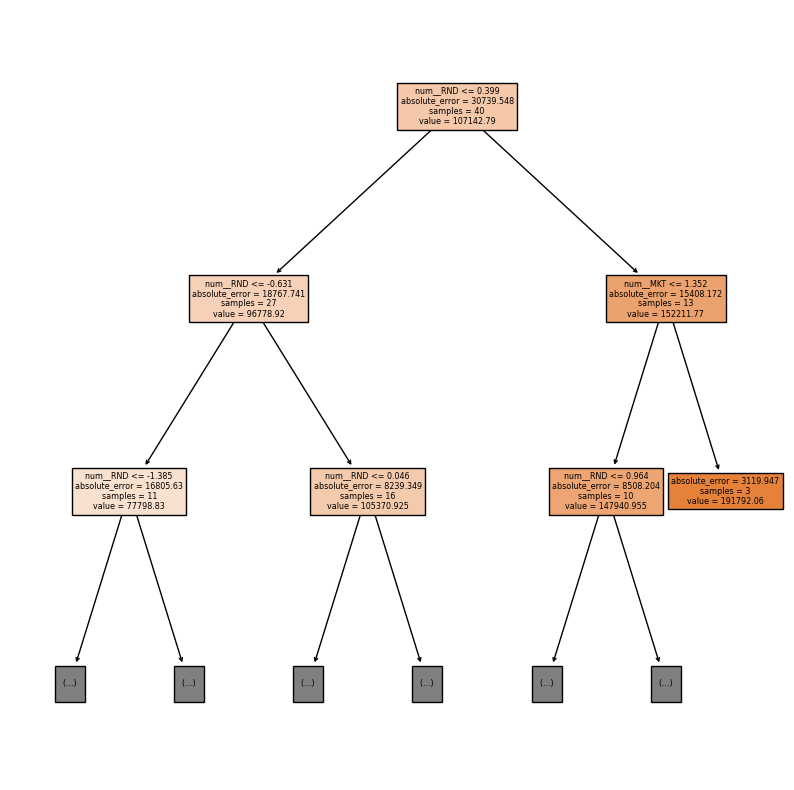

In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(best_dtr,max_depth=2,feature_names=xtrain.columns,filled=True)
plt.show()